In [1]:
import os

In [2]:
import cv2

In [3]:
import numpy as np

In [73]:
import face_recognition

In [165]:
image = face_recognition.load_image_file("68a.jpgl.jpg")
face_landmarks_list = face_recognition.face_landmarks(image)

In [167]:
face_landmarks_list

[]

In [164]:
sample_img=np.array(cv2.imread("4b.jpgl.jpg"))
for data in face_landmarks_list[0]:
    for (i,j) in face_landmarks_list[0][data]:
        try:
            sample_img[j][i][:]=[0,0,0]
        except:
            print(j,i)

259 114
261 140
256 166


In [128]:
cv2.imwrite('pred_.jpg',sample_img)

True

In [76]:
def align_position(sample_img,r_start,r_stop,r_index,c_start,c_stop,c_index,flag):
    for i in range(r_start,r_stop,r_index):
        for j in range(c_start,c_stop,c_index):
            x,y=i,j
            if(flag!=1):
                temp=y
                y=x
                x=temp
            if(not np.array_equal(sample_img[x][y][:],np.array([128,128,128]))):
                sample_img[x][y][:]=[0,0,0]
            else:
                break
                
    return sample_img

In [77]:
def produce_face(sample_img):
    row=len(sample_img)
    column=len(sample_img[0])
    sample_img=align_position(sample_img,0,row,1,0,column,1,1)
    sample_img=align_position(sample_img,0,row,1,column-1,-1,-1,1)
    sample_img=align_position(sample_img,0,column,1,0,row,1,-1)
    sample_img=align_position(sample_img,0,column,1,row-1,-1,-1,-1)
    return sample_img

In [147]:
def connect_points(points1,points2,point_list):
    y1,x1 = points1
    y2,x2 = points2
    try:
        m=(y2-y1)/(x2-x1)
    except:
        m=(y2-y1)/1
    n=y1-m*x1
    point_list.append((x2,y2))
    if(abs(y2-y1)>abs(x2-x1)):
        for y in range(y1, y2, 1 if y2>y1 else -1):
            try:
                x=round((y-n)/m)
            except:
                x=n
            point_list.append((x,y))
    else:
        for x in range(x1,x2, 1 if x2>x1 else -1):
            y=round(m*x+n)
            point_list.append((x,y))
            
    return point_list

In [160]:
def remove_bound(point_list,i,j):
    lst=[]
    for (x,y) in point_list:
        if(x>=i):
            a=i-2
            b=y
        if(y>=j):
            b=j-2
            a=x
        if(x<i and y<j):
            a,b=x,y
        lst.append((a,b))
    return lst

In [173]:
def face_positions(image_name):
    image = face_recognition.load_image_file(image_name)
    face_landmarks_list = face_recognition.face_landmarks(image)
    
    sample_img=np.array(cv2.imread(image_name))
    point_list=[]
    for data in face_landmarks_list[0]:
        if data in ['chin','left_eyebrow','right_eyebrow']:
            points=face_landmarks_list[0][data]
            points=remove_bound(points,len(sample_img[1]),len(sample_img[0]))
            for ln in range(len(points)-1):
                point_list=connect_points(points[ln],points[ln+1],point_list)

    point_list=connect_points(face_landmarks_list[0]['chin'][0],face_landmarks_list[0]['left_eyebrow'][0],point_list)
    point_list=connect_points(face_landmarks_list[0]['chin'][16],face_landmarks_list[0]['right_eyebrow'][4],point_list)
    point_list=connect_points(face_landmarks_list[0]['left_eyebrow'][4],face_landmarks_list[0]['right_eyebrow'][0],point_list)

    
    point_list=remove_bound(point_list,len(sample_img[1]),len(sample_img[0]))
    print((point_list))
    for (x,y) in point_list:
        sample_img[x][y][:]=[128,128,128]
        
    sample_img=produce_face(sample_img)
    
    cv2.imwrite('pred.jpg',sample_img)
    

In [174]:
face_positions("inmg.jpg")

[(115, 47), (93, 46), (94, 46), (95, 46), (96, 46), (97, 46), (98, 46), (99, 46), (100, 46), (101, 46), (102, 46), (103, 46), (104, 46), (105, 47), (106, 47), (107, 47), (108, 47), (109, 47), (110, 47), (111, 47), (112, 47), (113, 47), (114, 47), (137, 50), (115, 47), (116, 47), (117, 47), (118, 47), (119, 48), (120, 48), (121, 48), (122, 48), (123, 48), (124, 48), (125, 48), (126, 48), (127, 49), (128, 49), (129, 49), (130, 49), (131, 49), (132, 49), (133, 49), (134, 50), (135, 50), (136, 50), (160, 54), (137, 50), (138, 50), (139, 50), (140, 51), (141, 51), (142, 51), (143, 51), (144, 51), (145, 51), (146, 52), (147, 52), (148, 52), (149, 52), (150, 52), (151, 52), (152, 53), (153, 53), (154, 53), (155, 53), (156, 53), (157, 53), (158, 54), (159, 54), (182, 60), (160, 54), (161, 54), (162, 55), (163, 55), (164, 55), (165, 55), (166, 56), (167, 56), (168, 56), (169, 56), (170, 57), (171, 57), (172, 57), (173, 58), (174, 58), (175, 58), (176, 58), (177, 59), (178, 59), (179, 59), (180,

In [122]:
img.shape

(600, 523, 3)

In [66]:
img=cv2.imread("1623_1.jpg")
imAg=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [67]:
print(img.shape)
print(imAg.shape)

(600, 523, 3)
(600, 523, 3)


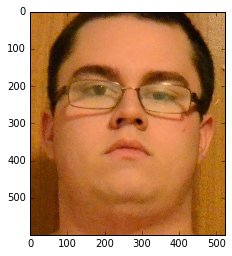

In [68]:
plt.imshow(imAg)

In [14]:
import numpy as np


In [43]:
img_reshape=np.reshape(imAg,(1,600,523,3))

In [44]:
img_reshape[0].shape

(600, 523, 3)

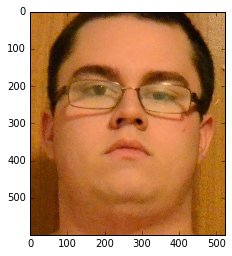

In [45]:
p=plt.imshow(img_reshape[0])

In [46]:
from keras.preprocessing.image import ImageDataGenerator

In [64]:
data_gen=ImageDataGenerator(rescale=1./255,
                            width_shift_range=0.1,
                            featurewise_std_normalization=True,
                            fill_mode='constant',
                 height_shift_range=0.1,
                           channel_shift_range=0.4)

In [48]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
    
%matplotlib inline

In [58]:
data_gen.flow(img_reshape, batch_size=1,save_to_dir='output', save_prefix='cat', save_format='jpg')

In [65]:
i = 0
for b in data_gen.flow(img_reshape, batch_size=1,save_to_dir='output', save_prefix='cat', save_format='jpg'):
    i+=1
    if(i==20):
        break

C:\Users\rbkro\Anaconda3\lib\site-packages\keras\preprocessing\image.py:514: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn'tbeen fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
